In [1]:
import requests

server = 'api.outbreak.info' # or 'dev.outbreak.info'
auth = ***REMOVED*** # keep this private!
nopage = 'fetch_all=true&page=0' # worth verifying that this works with newer ES versions as well

def get_outbreak_data(endpoint, argstring, server=server, auth=auth):
    auth = {'Authorization': str(auth)}
    return requests.get(f'https://{server}/{endpoint}?q={argstring}', headers=auth)

In [2]:
location = 'GBR'
data = get_outbreak_data('covid19/query', f"location_id:{location}&sort=date&fields=date,confirmed_numIncrease&{nopage}")

In [3]:
import pandas as pd 

In [4]:
raw=data.json()["hits"]

In [5]:
tableGBR=pd.DataFrame(raw)
tableGBR

,_id,_score,confirmed_numIncrease,date
0,GBR_None_None2020-04-14,8.508196,4325,2020-04-14
1,GBR_None_None2020-04-27,8.508196,4702,2020-04-27
2,GBR_None_None2020-05-06,8.508196,3831,2020-05-06
3,GBR_None_None2020-05-07,8.508196,3767,2020-05-07
4,GBR_None_None2020-05-08,8.508196,3049,2020-05-08
...,...,...,...,...
857,GBR_None_None2022-05-13,8.361235,6587,2022-05-13
858,GBR_None_None2022-05-14,8.361235,0,2022-05-14
859,GBR_None_None2022-05-15,8.361235,0,2022-05-15
860,GBR_None_None2022-06-06,8.361235,33053,2022-06-06


In [6]:
tableGBR.rename(columns = {'_id':'ID', '_score':'score', 'confirmed_numIncrease':'cases'}, inplace = True)
a=tableGBR.drop(columns=['score'], axis=1)
a

,ID,cases,date
0,GBR_None_None2020-04-14,4325,2020-04-14
1,GBR_None_None2020-04-27,4702,2020-04-27
2,GBR_None_None2020-05-06,3831,2020-05-06
3,GBR_None_None2020-05-07,3767,2020-05-07
4,GBR_None_None2020-05-08,3049,2020-05-08
...,...,...,...
857,GBR_None_None2022-05-13,6587,2022-05-13
858,GBR_None_None2022-05-14,0,2022-05-14
859,GBR_None_None2022-05-15,0,2022-05-15
860,GBR_None_None2022-06-06,33053,2022-06-06


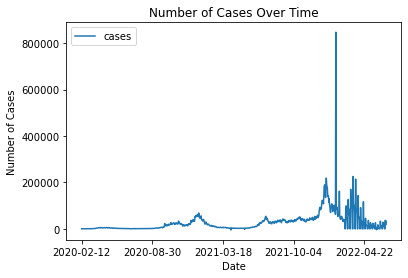

In [7]:
a = a.sort_values(by="date")
lines = a.plot.line(x='date', y='cases', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')